<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/DuDoanTuongLaiBangKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Preprocessing để Training 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Face_images/Training', target_size = (30,40), batch_size = 32, class_mode = 'categorical')

Found 45 images belonging to 16 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/Face_images/Test', target_size = (30,40), batch_size = 32, class_mode = 'categorical')
training_set.class_indices
test_set.class_indices

Found 45 images belonging to 16 classes.


{'Binh': 0,
 'Chi': 1,
 'Chuong': 2,
 'Dong': 3,
 'Hieu': 4,
 'NHuy': 5,
 'Nam': 6,
 'Phi': 7,
 'Phong': 8,
 'Thang': 9,
 'Thanh': 10,
 'Tien': 11,
 'Tri': 12,
 'Tu': 13,
 'Tuan': 14,
 'Tung': 15}

In [23]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(16, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 20, 64)        36928     
                                                      

In [24]:
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [25]:
# Huấn luyện
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
# fit the model
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), validation_steps=len(test_set))

<ipython-input-25-eb5857a978ab>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), validation_steps=len(test_set))


Epoch 1/80
2/2 [==============================] - 20s 14s/step - loss: 2.8446 - accuracy: 0.0667 - val_loss: 2.7695 - val_accuracy: 0.0667
Epoch 2/80
2/2 [==============================] - 1s 763ms/step - loss: 2.7751 - accuracy: 0.0667 - val_loss: 2.7651 - val_accuracy: 0.0667
Epoch 3/80
2/2 [==============================] - 2s 765ms/step - loss: 2.7638 - accuracy: 0.0667 - val_loss: 2.7630 - val_accuracy: 0.0667
Epoch 4/80
2/2 [==============================] - 1s 759ms/step - loss: 2.7627 - accuracy: 0.0667 - val_loss: 2.7534 - val_accuracy: 0.0667
Epoch 5/80
2/2 [==============================] - 1s 821ms/step - loss: 2.7577 - accuracy: 0.0444 - val_loss: 2.7483 - val_accuracy: 0.0889
Epoch 6/80
2/2 [==============================] - 1s 764ms/step - loss: 2.7460 - accuracy: 0.0889 - val_loss: 2.7407 - val_accuracy: 0.1111
Epoch 7/80
2/2 [==============================] - 3s 2s/step - loss: 2.7464 - accuracy: 0.0667 - val_loss: 2.7343 - val_accuracy: 0.0889
Epoch 8/80
2/2 [========

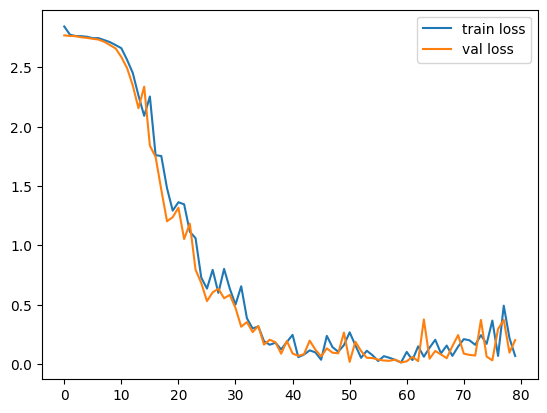

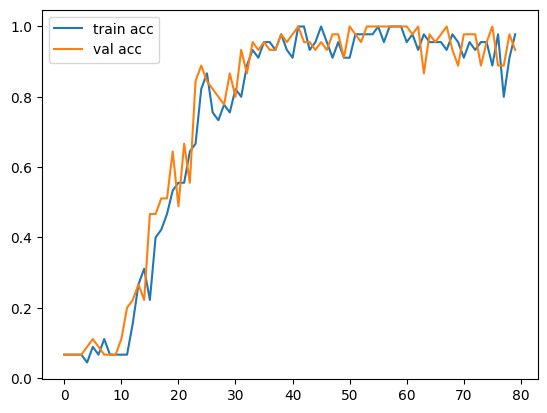

<Figure size 640x480 with 0 Axes>

In [27]:
#loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model.save('/content/drive/MyDrive/AI/Face_images/model_inception.h5')

model=load_model('/content/drive/MyDrive/AI/Face_images/model_inception.h5')
model

os.chdir('/content/drive/MyDrive/AI/Face_images/Valid')

!ls

1.jpg		Anh11.jpg  Anh15.jpg  Anh3.jpg	Anh6.jpg  Anh9.jpg
AccVal_acc.png	Anh13.jpg  Anh1.jpg   Anh4.jpg	Anh7.jpg  AnhME.jpg
Anh10.jpg	Anh14.jpg  Anh2.jpg   Anh5.jpg	Anh8.jpg  LossVal_loss.png


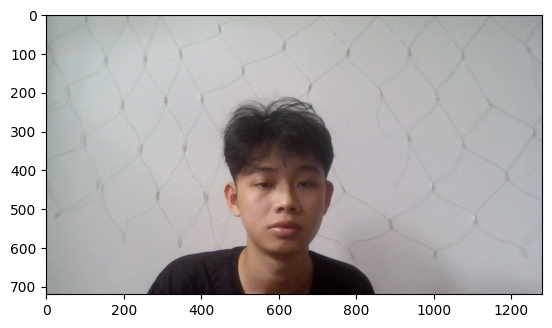

In [37]:
img_data = load_img('/content/drive/MyDrive/AI/Face_images/Valid/Anh8.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

Chọn image : Anh8
1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Sung sướng


KeyboardInterrupt: ignored

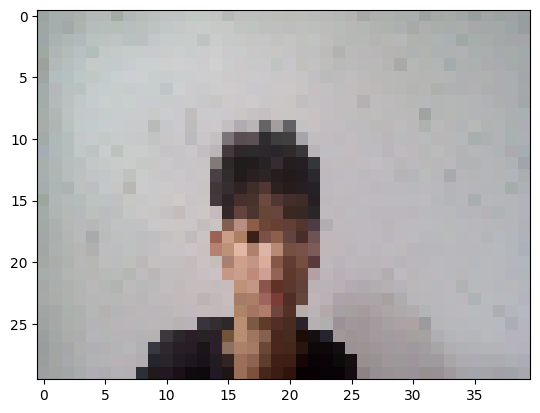

In [40]:
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/AI/Face_images/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<16):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==9) :
         c=10
     if c == 0:
       prediction = 'Tương lai sẽ có xe ô tô'
     elif c == 1:
       prediction = 'Tương lai sẽ có nhà to'
     elif c == 2:
       prediction = 'Tương lai sẽ có nhà nhỏ'
     elif c == 3:
       prediction = 'Tương lai sẽ Giàuu'
     elif c == 4:
       prediction = 'Tương lai sẽ có nhiều vợ'
     elif c==5:
       prediction ='Tương lai sẽ có nhiều tiền'
     elif c == 6:
       prediction = 'Sống lâuuu'
     elif c == 7:
       prediction = 'Tương lai sẽ có cty riêng'
     elif c == 8:
       prediction = 'Tương lai sẽ có 3 vợ'
     elif c==9:
       prediction ='Sung sướng'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )